In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from spn.io.file import from_file
from spn.actions.map_algorithms.lagrangian_relaxation import *
from spn.actions.map_algorithms.max_search import *

In [2]:
spn = from_file('learned-spns/iris.spn')

In [3]:
best_evidence = max_search(spn, marginal_checking)
MAP = spn.value(best_evidence)
print(best_evidence)
print(MAP)

0 => [1] 1 => [0] 2 => [1] 3 => [1] 4 => [0] 
0.2874112879434472


In [6]:
max_iterations = 500
r = .008
beta1 = 0.9
beta2 = 0.999
epsilon = 10 ** -8

diagnostic = LRDiag(spn, max_iterations=max_iterations, r=r, beta1=beta1, beta2=beta2, epsilon=epsilon)
diagnostic.lagrangian_relaxation()

0 => [1] 1 => [0] 2 => [1] 3 => [1] 4 => [0] 

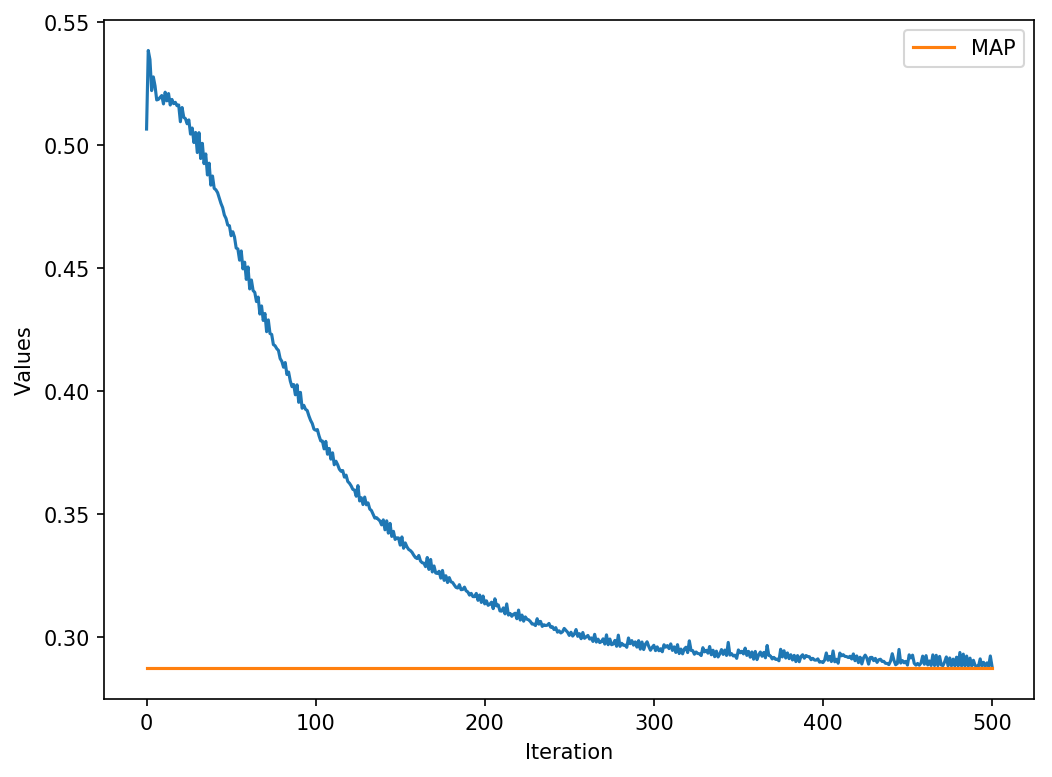

In [7]:
plt.figure(figsize=(8,6), dpi=150)
plt.plot(diagnostic.values)
plt.plot([MAP for i in range(len(diagnostic.values))], label="MAP")
plt.ylabel('Values')
plt.xlabel('Iteration')
plt.legend()
plt.show()
